In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def compute_pca(X):
    mu = np.mean(X, axis=0)
    X_c = X - mu
    XX_T = np.cov(X_c, rowvar=False)
    eigval, eigvec = np.linalg.eigh(XX_T)
    sorted_indices = np.argsort(eigval)[::-1]
    eigval = eigval[sorted_indices]
    eigvec = eigvec[:, sorted_indices]
    proxy = X_c.dot(eigvec)
    var_ratio = eigval / np.sum(eigval)
    return eigvec, proxy, var_ratio

In [43]:
data = pd.read_csv('train.csv')
L = data['label']
features = data.drop('label', axis=1)
sampled_data = pd.DataFrame()
np.random.seed(24)
for i in range(10):
    indices = L.index[L == i]
    sampled_indices = np.random.choice(indices, size=100, replace=False)
    sampled_data = pd.concat([sampled_data, features.loc[sampled_indices]])
sampled_data.reset_index(drop=True, inplace=True)

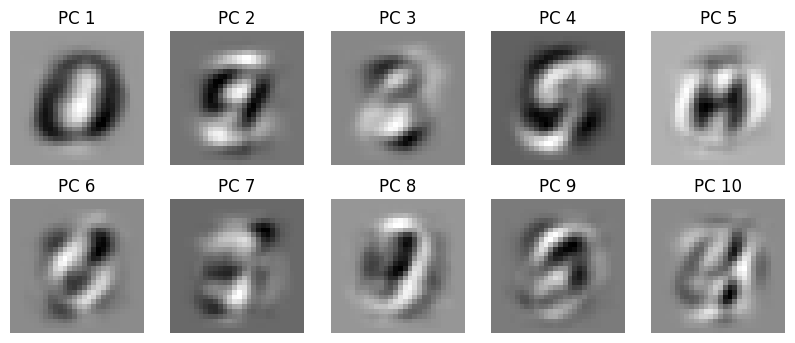

In [44]:
X = sampled_data.to_numpy()
mu = np.mean(X, axis=0)
X_c = X - mu
XX_T = np.cov(X_c, rowvar=False)
eigval, eigvec = np.linalg.eigh(XX_T)
sorted_indices = np.argsort(eigval)[::-1]
eigval = eigval[sorted_indices]
eigvec = eigvec[:, sorted_indices]
proxy = X_c.dot(eigvec)
var_ratio = eigval / np.sum(eigval)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    r = i // 5 
    c = i % 5
    pc = eigvec[:, i].reshape(28, 28)
    axes[r, c].imshow(pc, cmap='gray')
    axes[r, c].set_title(f'PC {i+1}')
    axes[r, c].axis('off')
plt.show()

In [45]:
print("Explained Variance Ratio:")
for i in range(10):
    print(f"PC {i+1}: {var_ratio[i]*100:.3f}%")

Explained Variance Ratio:
PC 1: 10.038%
PC 2: 7.239%
PC 3: 6.260%
PC 4: 5.250%
PC 5: 4.667%
PC 6: 4.508%
PC 7: 3.545%
PC 8: 2.846%
PC 9: 2.767%
PC 10: 2.452%
